#### Text Classification

In [10]:
review_1="The movie was good and we really like it"
review_2="the movie was good but the ending was boring"
review_3="we did not like the movie as it was too lengthy"

In [11]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize

In [12]:
review_1_tokens=word_tokenize(review_1)
print(review_1_tokens)
review_2_tokens=word_tokenize(review_2)
print(review_2_tokens)
review_3_tokens=word_tokenize(review_3)
print(review_3_tokens)

['The', 'movie', 'was', 'good', 'and', 'we', 'really', 'like', 'it']
['the', 'movie', 'was', 'good', 'but', 'the', 'ending', 'was', 'boring']
['we', 'did', 'not', 'like', 'the', 'movie', 'as', 'it', 'was', 'too', 'lengthy']


In [13]:
review_tokens=set(review_1_tokens).union(set(review_2_tokens)).union(set(review_3_tokens))
print(review_tokens)

{'not', 'boring', 'ending', 'really', 'it', 'movie', 'the', 'too', 'but', 'did', 'we', 'as', 'good', 'The', 'like', 'lengthy', 'was', 'and'}


In [14]:
len(review_tokens)

18

In [7]:
review_tokens

{'The',
 'and',
 'as',
 'boring',
 'but',
 'did',
 'ending',
 'good',
 'it',
 'lengthy',
 'like',
 'liked',
 'movie',
 'not',
 'really',
 'the',
 'too',
 'was',
 'we'}

In [16]:
review1_dict=dict.fromkeys(review_tokens,0)

In [17]:
review1_dict

{'not': 0,
 'boring': 0,
 'ending': 0,
 'really': 0,
 'it': 0,
 'movie': 0,
 'the': 0,
 'too': 0,
 'but': 0,
 'did': 0,
 'we': 0,
 'as': 0,
 'good': 0,
 'The': 0,
 'like': 0,
 'lengthy': 0,
 'was': 0,
 'and': 0}

In [18]:
review1_dict=dict.fromkeys(review_tokens,0)
review2_dict=dict.fromkeys(review_tokens,0)
review3_dict=dict.fromkeys(review_tokens,0)

In [20]:
for token in review_1_tokens:
    review1_dict[token]+=1

In [21]:
review1_dict

{'not': 0,
 'boring': 0,
 'ending': 0,
 'really': 1,
 'it': 1,
 'movie': 1,
 'the': 0,
 'too': 0,
 'but': 0,
 'did': 0,
 'we': 1,
 'as': 0,
 'good': 1,
 'The': 1,
 'like': 1,
 'lengthy': 0,
 'was': 1,
 'and': 1}

In [22]:
for token in review_2_tokens:
    review2_dict[token]+=1
    
for token in review_3_tokens:
    review3_dict[token]+=1

In [23]:
reviews_Dict_DF=pd.DataFrame([review1_dict,review2_dict,review3_dict])

In [24]:
reviews_Dict_DF

,not,boring,ending,really,it,movie,the,too,but,did,we,as,good,The,like,lengthy,was,and
0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,1,1
1,0,1,1,0,0,1,2,0,1,0,0,0,1,0,0,0,2,0
2,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
review_list=[review_1,review_2,review_3]
review_list

['The movie was good and we really like it',
 'the movie was good but the ending was boring',
 'we did not like the movie as it was too lengthy']

In [34]:
count_vect=CountVectorizer()
count_vect

CountVectorizer()

In [35]:
X_counts=count_vect.fit_transform(review_list)

In [36]:
type(X_counts)

scipy.sparse.csr.csr_matrix

In [37]:
X_names=count_vect.get_feature_names()
X_names

['and',
 'as',
 'boring',
 'but',
 'did',
 'ending',
 'good',
 'it',
 'lengthy',
 'like',
 'movie',
 'not',
 'really',
 'the',
 'too',
 'was',
 'we']

In [39]:
a=pd.DataFrame(X_counts.toarray(),columns=X_names)
a

,and,as,boring,but,did,ending,good,it,lengthy,like,movie,not,really,the,too,was,we
0,1,0,0,0,0,0,1,1,0,1,1,0,1,1,0,1,1
1,0,0,1,1,0,1,1,0,0,0,1,0,0,2,0,2,0
2,0,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tf_vect=TfidfVectorizer(min_df=1,lowercase=True,stop_words="english")

In [42]:
tf_matrix=tf_vect.fit_transform(review_list)

In [43]:
type(tf_matrix)

scipy.sparse.csr.csr_matrix

In [44]:
tf_matrix.shape

(3, 8)

In [45]:
tf_names=tf_vect.get_feature_names()

In [46]:
tf_names

['boring', 'did', 'ending', 'good', 'lengthy', 'like', 'movie', 'really']

In [47]:
tf_df=pd.DataFrame(tf_matrix.toarray(),columns=tf_names)

In [48]:
tf_df

,boring,did,ending,good,lengthy,like,movie,really
0,0.000000,0.000000,0.000000,0.480458,0.000000,0.480458,0.373119,0.631745
1,0.584483,0.000000,0.584483,0.444514,0.000000,0.000000,0.345205,0.000000
2,0.000000,0.584483,0.000000,0.000000,0.584483,0.444514,0.345205,0.000000


#### Text Classification Using Naives Bayes

In [49]:
#load the necessary libraries
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [50]:
#defining all the categories
categories=['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
            'comp.sys.mac.hardware', 'comp.windows.x', "misc.forsale",
            'rec.autos', 'rec.motorcycles','rec.sport.baseball',
            'rec.sport.hockey', 'sci.crypt', 'sci.electronics',
            'sci.med','sci.space', 'soc.religion.christian',
            'talk.politics.guns', 'talk.politics.mideast', 
            'talk.politics.misc', 'talk.religion.misc']
#Training the data on these categories
train=fetch_20newsgroups(subset="train", categories=categories)
#testing the data for these categories
test=fetch_20newsgroups(subset="test", categories=categories)

#printing training data
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [52]:
#importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
#creating a model based on Multinomial Naive Bayes
model=make_pipeline(TfidfVectorizer(), MultinomialNB())
#Training the model with train data
model.fit(train.data, train.target)
#creating labels for the test data
labels=model.predict(test.data)

Text(89.133125, 0.5, 'predicted label')

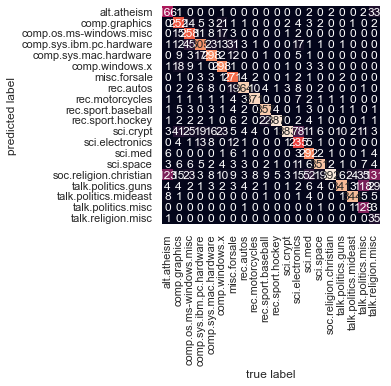

In [53]:
#creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
#plotting Heatmap of confusion matrix
plt.xlabel("true label")
plt.ylabel("predicted label")

In [54]:
#predicting category on new data based on trained model
def predict_category(s, train=train, model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [55]:
predict_category("Jesus Christ")

'soc.religion.christian'

In [56]:
predict_category("Sending load to International Space Station")

'sci.space'

In [57]:
predict_category("BMW is better than Audi")

'rec.autos'

In [58]:
predict_category("President of India")

'talk.politics.misc'